## Final Project Submission

Please fill out:
* Student name: Thomas Brown
* Student pace: Full Time
* Scheduled project review date/time: tbd
* Instructor name: Abhineet Kulkarni
* Blog post URL: tbd


In [107]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
%matplotlib inline
sns.set_style('darkgrid')
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import statsmodels.api as sm

# Importing Data:

In [3]:
df = pd.read_csv('kc_house_data.csv')
display(df.head())
display(df.info())

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


None

## Exploring Data:

### Columns:

In [5]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Here's a list of the columns in the dataframe:
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

## Data Cleaning:

In [122]:
df.isna().sum()
# Right off the bat, we see that the following values will need to be cleaned:
# Waterfront
# View
# Year Renovated
# Let's deal with these before searching for other hidden junk data and outliers.

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
has_basement     0
has_view         0
has_ren          0
dtype: int64

### Waterfront: (done)

In [4]:
display(df['waterfront'].unique())
nulls1 = df['waterfront'].isna().sum()
print (f"{nulls1} null values in 'Waterfront'")
# Let's replace NaNs with 0s.  No further cleaning needed, this makes it a perfect dummy variable. 
# Given there are over 2,000 null values, I think it's safe to say these are meant to be 0s (not waterfront).

array([nan,  0.,  1.])

2376 null values in 'Waterfront'


In [5]:
# Replacing the nulls with 0s. 
df['waterfront'].fillna(0, inplace = True)
# Verifying that it worked
df['waterfront'].unique()

array([0., 1.])

### View: (done)

In [59]:
# Identifying the issue. . . (If code has already been run, null won't appear)
display(df['view'].unique())
nulls2 = df['view'].isna().sum()
print (f"{nulls2} null values in 'View'")
# Only 63 null values to deal with.  
# Null values here should likely just be replaced with 0 as well

array([0., 3., 4., 2., 1.])

0 null values in 'View'


In [60]:
# Let's start by replacing the nulls with 0.
df['view'].fillna(0, inplace = True)

In [61]:
# Just to be safe, I'm make a new column, just to see whether or not a house has been viewed at all.
df['has_view'] = df['view'].map(lambda x: 1 if x > 0 else 0)

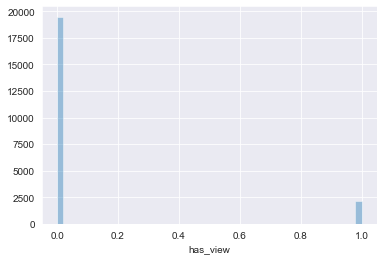

In [62]:
# It's strange that so many houses have 0 views. . . 
sns.distplot(df.has_view, kde = False)

### Year Renovated: (done)

In [7]:
display(df['yr_renovated'].unique())
nulls3 = df['yr_renovated'].isna().sum()
print (f"{nulls3} null values in 'Year Renovated'")
# Here, we have 3,842 values to replace.
# Given we have a 0 value, I think it's safe to replace the nulls with 0s to represent houses 
# that have not been renovated.


array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

3842 null values in 'Year Renovated'


In [8]:
df.yr_renovated.value_counts()
# Vast majority of houses have not seen renovations.

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

__We have a couple things to do here:__
- We need to replace the null values with 0s.  I think it's safe to assume that nulls, have not been renovated.
    - If it were a more significant portion of the total houses listed (~22k) I would likely use a more <br>
    elegant solution such replacing nulls with year built + average time from build to remodel.
    - For now, though, I'm assuming these houses have not been remodeled.
- Second, I don't want to lose the year renovated, but I also need a dummy variable for is renovated or not. <br>
As such, I'll start with making a new column, "has_been_renovated" where 0 is "no renovation" and 1 is "has been renovated"

In [72]:
# Let's start by tackling those nulls and then making a dummy variable:
df['yr_renovated'].fillna(0, inplace = True)
df['has_ren'] = df['yr_renovated'].map(lambda x: 1 if x > 0 else 0)
df.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,has_basement,has_view,has_ren
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,1955,0.0,98178,47.5112,-122.257,1340,5650,0,0,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,1,0,1


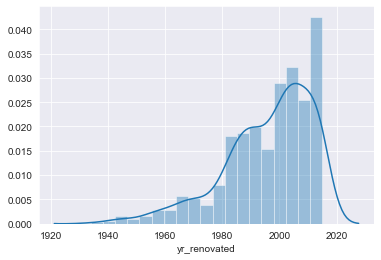

In [103]:
# Histogram of renovation for homes that have seen a renovation.
dftest = df[df['yr_renovated'] > 1]
sns.distplot(dftest.yr_renovated);

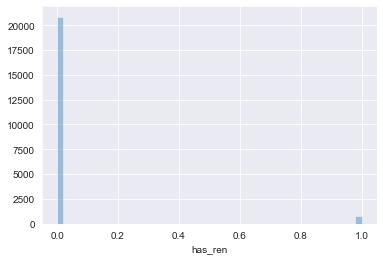

In [102]:
# Histogram showing proportion of homes that have been renovated.
sns.distplot(df.has_ren, kde = False);

In [83]:
# Only 744 renovations overall
df.has_ren.value_counts()

0    20853
1      744
Name: has_ren, dtype: int64

### SquareFeet Basement: (done)

If you look closely, you'll see a value listed as '?' listed below.  We'll need to replace those with 0s!
We'll also want to convert this to an int value when complete.
<br>We'll want a dummy variable here as well to deal with the large majority of 0s in the distribution.

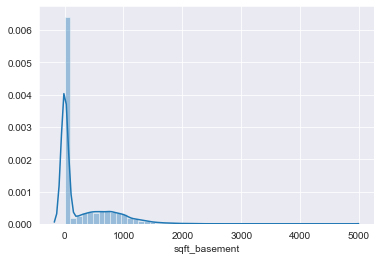

In [104]:
sns.distplot(df.sqft_basement);

In [29]:
# Here, we're replacing the '?' with a 0, then converting all values to int
df['sqft_basement'] = df['sqft_basement'].map(lambda x: 0 if x == '?' else x)
df['sqft_basement'] = df['sqft_basement'].astype('float')

In [33]:
# Creating a dummy variable to deal with the 0 biased basement issue
df['has_basement'] = df['sqft_basement'].map(lambda x: 1 if x > 0 else 0)
df.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,has_basement
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1


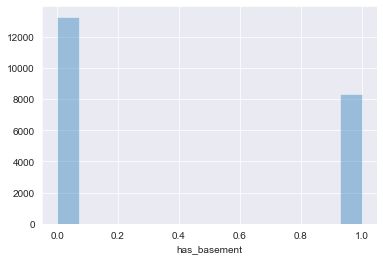

In [50]:
# Dummy variable below.  Now we can simply see if having a basement adds value.
sns.distplot(df.has_basement, kde = False);

### Grade: (done)

In [34]:
df['grade'].unique()
# Strange, it appears to be a scale from 3 to 13.  By subracting 3 from all, we can normalize the scale.

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13])

In [35]:
# 0 through 10.  Much better.
df['grade'] = df['grade'].map(lambda x: x - 3)
df['grade'].unique()

array([ 4,  3,  5,  8,  6,  2,  7,  9,  1,  0, 10])

### Date: (done)

Here, I simply changed the format so it can be read more easily later on.

In [65]:
df['date'] = pd.to_datetime(df['date'])

# Exploratory Data Analysis:

## Q1: 

Idea: Map of KC with heat over size of house relative to price. . .

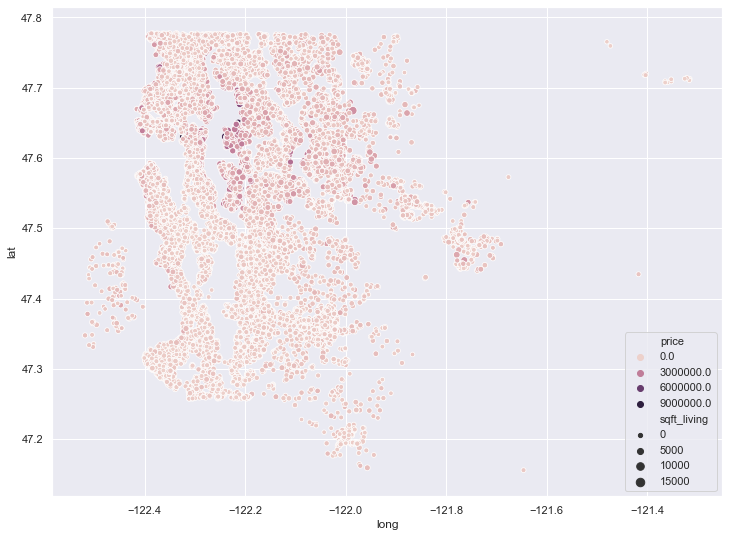

In [43]:
ax = sns.scatterplot(data = df, x = 'long',y = 'lat', hue = 'price', 
                     size = 'sqft_living')
sns.set(rc={'figure.figsize':(12,9)})
# Need to figure out the color min/max.  Also would be awesome to set this over an actual map.

### Folium Test:

In [142]:
import folium
kc_coord = (47.6062, -122.335167)
max_records = 300 # Need for speed
# Creating an empty map
map = folium.Map(location = kc_coord, zoom_start = 10, tiles='Cartodb Positron')

# Adding markers:

for each in df[0:max_records].iterrows():
    map.simple_marker(
        location = [each[1]['lat'],each[1]['long']], 
        clustered_marker = True)
    
display(map)

AttributeError: 'Map' object has no attribute 'simple_marker'

## Q2:

Idea: Best time to sell by area.  Split Seattle into grouped zips.

## Q3:

Idea: 

# Feature Engineering:

## Categorical vs. Continuous:

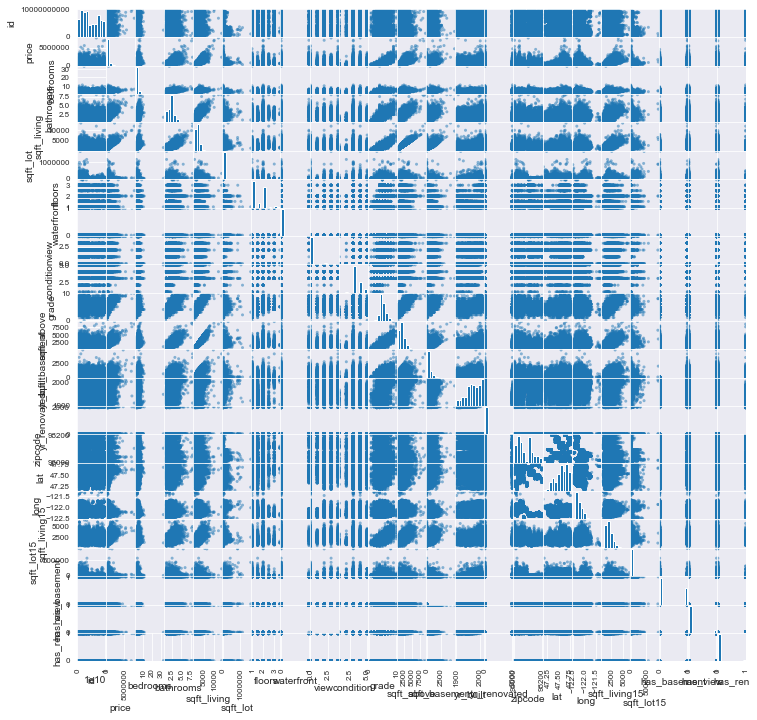

In [97]:
# Scatter matrix to distinguish between categorical and continuous variables.
# We'll also start to get an idea of which variables will be useful for regression.
# We'll start by narrowing it down to exclude several variables such as lat and long.
'''
df1 = df['price','bedrooms','sqft_living','sqft_lot','floors',
                              'waterfront','view','condition','grade','sqft_above',
                              'sqft_basement','yr_built','yr_renovated',
                              'sqft_living15','sqft_lot15']
'''
pd.plotting.scatter_matrix(df, figsize = [12, 12] );
plt.show()
#Need to pair this down a looooot
# Can use df2 = df.drop(etc. . . )

In [ ]:
'''
EXAMPLE CODE FROM LESSON:
continuous = ['LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']
categoricals = ['BldgType', 'KitchenQual', 'SaleType', 'MSZoning', 'Street', 'Neighborhood']

ames_cont = ames[continuous]

# log features
log_names = [f'{column}_log' for column in ames_cont.columns]

ames_log = np.log(ames_cont)
ames_log.columns = log_names

# normalize (subract mean and divide by std)

def normalize(feature):
    return (feature - feature.mean()) / feature.std()

ames_log_norm = ames_log.apply(normalize)

# one hot encode categoricals
ames_ohe = pd.get_dummies(ames[categoricals], prefix=categoricals, drop_first=True)

preprocessed = pd.concat([ames_log_norm, ames_ohe], axis=1)

X = preprocessed.drop('SalePrice_log', axis=1)
y = preprocessed['SalePrice_log']
'''

### Categorical:

In [ ]:
df_cat = []

#### One Hot Encoding:

### Continuous:

In [ ]:
df_con = []

#### Log and Other Transformations:

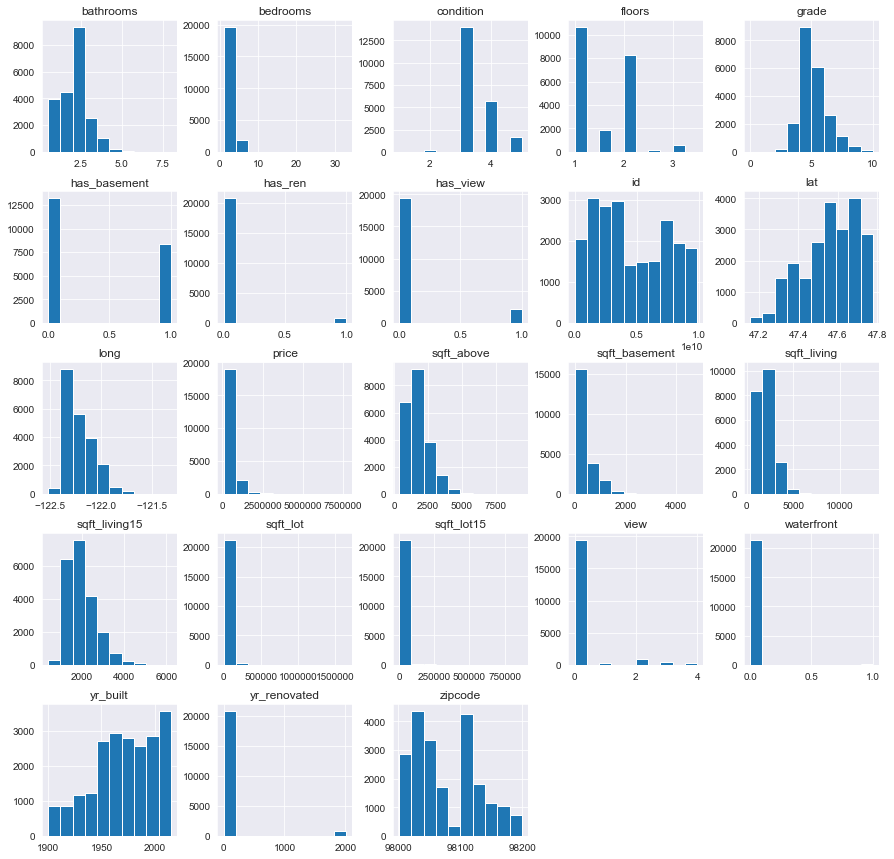

In [98]:
# Histogram to explore normality.  This is a basic eyeball test.
# Many of the values appear skewed or zero biased.
df.hist(figsize=(15,15));

Log Transformations are a way of inducing normality from an otherwise not normally distributed set of data.

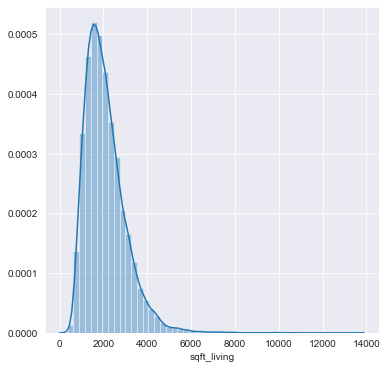

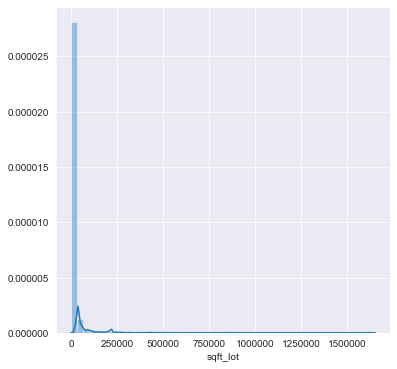

In [99]:
#Use this to assess normality after log transformations
cont_var = ['sqft_living', 'sqft_lot']

for x in cont_var:
    ax, figure = plt.subplots(1,1,figsize=(6,6))
    sns.distplot(df[x])

## Multicollinearity:

Multicollinearity is an issue that can lead to a broken regression result when two explanatory variables are too highly correlated for the model to tell which is the driving in terms of the result.

In [14]:
# Checking to see if any potential explanitory variables are highly correlated.
# Anything over .75 will be addressed/removed.
# This chart is a bit unwieldy, but we will look at a simpler version below. 
abs(df.corr()) > 0.75

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
price,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,True,True,False,False,False,False,False,True,True,False,False,False,False,False,True,False
sqft_lot,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


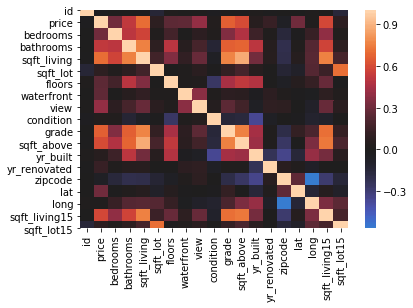

In [15]:
# Heatmap for quick visualization.
sns.heatmap(df.corr(), center=0);

The above chart is a bit messy.  We're just searching for values correlated more strongly than .75.  Let's simplify it by using a new color scheme, where the color only becomes brighter after a correlation stronger than .75.

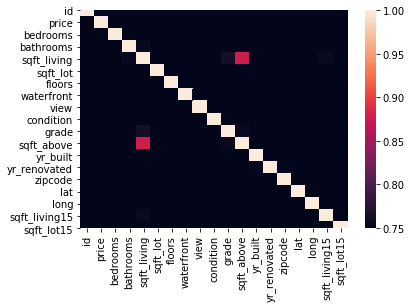

In [24]:
sns.heatmap(df.corr(), vmin=0.75);

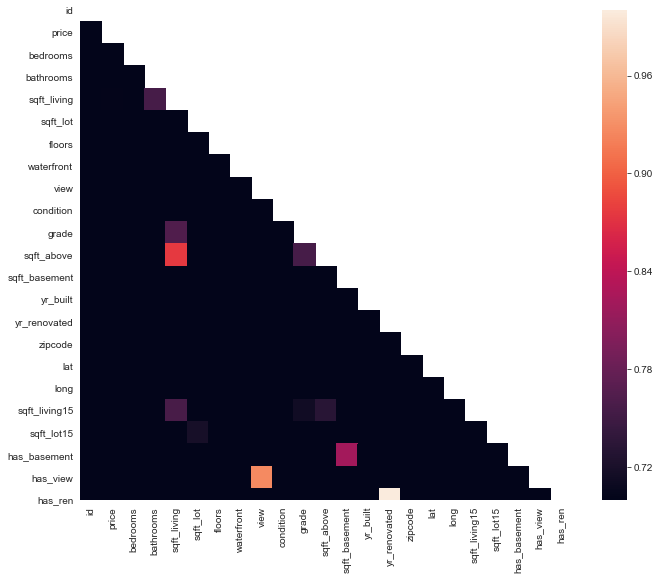

In [121]:
sns.set_style('white')
f, ax = plt.subplots(figsize=(11, 9))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(df.corr(), vmin=0.7, mask = mask);

Much better!  It looks like we'll just need to take care of sqft_living vs. sqft_above.  I think general living space is more important to focus on, so let's drop sqft_above from our future regression model.

# Train/Test Split:

In [ ]:
'''
EXAMPLE K FOLD CODE:

from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score

mse = make_scorer(mean_squared_error)

cv_5_results = cross_val_score(linreg, X, y, cv=5, scoring=mse)

MAYBE TRY WITH K = 10 OR 20 AS WELL.  NEED TO KNOW WHICH IS BETTER AND WHY
'''

# Regression Models:

Importing Libraries:

In [48]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
from sklearn.preprocessing import LabelBinarizer
import warnings
warnings.filterwarnings('ignore')

## Simple Linear Model:

Here, we'll start with a relatively simple model to explore the data and see which variables are the most significant with a regression.

In [ ]:
# This model essentially uses everything.  Do not run yet.  Clean first.
predictors = df.drop('price', axis=1)
predictors_int = sm.add_constant(predictors)
model = sm.OLS(df['price'],predictors_int).fit()
model.summary()

### Interpreting Results:

-

### Model Validity:

Heteroscedasticity, QQ Plots and more:

## Multiple Regression with Transformations:

### Interpreting Results:

-

### Model Validity:

Heteroscedasticity, QQ Plots and more:

## Testing for Interactions:

In [ ]:
'''
regression = LinearRegression()

continuous = ['LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']
categoricals = ['BldgType', 'KitchenQual', 'SaleType', 'MSZoning', 'Street', 'Neighborhood']

ames_cont = ames[continuous]

# log features
log_names = [f'{column}_log' for column in ames_cont.columns]

ames_log = np.log(ames_cont)
ames_log.columns = log_names

# normalize (subract mean and divide by std)

def normalize(feature):
    return (feature - feature.mean()) / feature.std()

ames_log_norm = ames_log.apply(normalize)

# one hot encode categoricals
ames_ohe = pd.get_dummies(ames[categoricals], prefix=categoricals)

preprocessed = pd.concat([ames_cont, ames_ohe], axis=1)

X = preprocessed.drop('SalePrice', axis=1)
y = preprocessed['SalePrice']

crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)
baseline = np.mean(cross_val_score(regression, X, y, scoring='r2', cv=crossvalidation))

baseline
'''

In [ ]:
'''
from itertools import combinations

# code to find top interactions by R^2 value here
interactions = []

feat_combinations = combinations(X.columns, 2)
data = X.copy()
for i, (a, b) in enumerate(feat_combinations):
    data['interaction'] = data[a] * data[b]
    score = np.mean(cross_val_score(regression, data, y, scoring='r2', cv=crossvalidation))
    if score > baseline:
        interactions.append((a, b, round(score,3)))
    
    if i % 50 == 0:
        print(i)
            
print('Top 3 interactions: %s' %sorted(interactions, key=lambda inter: inter[2], reverse=True)[:3])
'''

In [ ]:
'''
# Visualization code here
fig, ax = plt.subplots(figsize=(13, 10))

col = 'LotArea'

is_in = preprocessed.loc[preprocessed['Neighborhood_Edwards'] == 1, [col, 'SalePrice']]

linreg = LinearRegression()
linreg.fit(np.log(is_in[[col]]), np.log(is_in['SalePrice']))

preds = linreg.predict(np.log(is_in[[col]]))

ax.scatter(np.log(is_in[[col]]), np.log(is_in['SalePrice']), alpha=.3, label=None)

x = np.linspace(6, 12)
ax.plot(x, linreg.predict(x.reshape(-1, 1)), label=f'In Edwards:   {linreg.coef_[0]:.2f}')

not_in = preprocessed.loc[preprocessed['Neighborhood_Edwards'] == 0, [col, 'SalePrice']]

linreg = LinearRegression()
linreg.fit(np.log(not_in[[col]]), np.log(not_in['SalePrice']))

preds = linreg.predict(np.log(not_in[[col]]))

ax.scatter(np.log(not_in[[col]]), np.log(not_in['SalePrice']), alpha=.1, label=None)

x = np.linspace(6, 12)
ax.plot(x, linreg.predict(x.reshape(-1, 1)), label=f'Outside of Edwards:   {linreg.coef_[0]:.2f}')

ax.legend()
'''

In [ ]:
#Building the final model
'''
# code here
regression = LinearRegression()
crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)
final = X.copy()

final['Neighborhood_Edwards*LotArea'] = final['Neighborhood_Edwards'] * final['LotArea']

final_model = np.mean(cross_val_score(regression, final, y, scoring='r2', cv=crossvalidation))

final_model
'''

In [ ]:
'''
import statsmodels.api as sm
df_inter_sm = sm.add_constant(final)
model = sm.OLS(y,final)
results = model.fit()

results.summary()
'''

### Interpreting Results:

-

### Model Validity:

## Polynomial Regression:

Can we get better results with a polynomial model?  Let's try some of our top explanatory variables squared. . .

DO NOT RUN - FROM LAB

In [ ]:
#Train Test Split
from sklearn.model_selection import train_test_split
y = df['y']
X = df.drop(columns='y', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.75)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

colors = ['yellow', 'lightgreen', 'blue']
plt.figure(figsize=(10, 6))
plt.scatter(df['x'], df['y'], color='green', s=50, marker='.', label='plot points')

# We'll fit 3 different polynomial regression models from degree 2 to degree 4
for index, degree in enumerate([2, 3, 4]):
    
    # Instantiate PolynomialFeatures
    poly = PolynomialFeatures(degree)
    
    # Fit and transform X_train
    X_poly_train = poly.fit_transform(X_train)
    
    # Instantiate and fit a linear regression model to the polynomial transformed train features
    reg_poly = LinearRegression().fit(X_poly_train, y_train)
    
    # Transform the test data into polynomial features
    X_poly_test = poly.transform(X_test)
    
    # Get predicted values for transformed polynomial test data  
    y_pred = reg_poly.predict(X_poly_test)
    
    # Evaluate model performance on test data
    print("degree %d" % degree, r2_score(y_test, y_pred))
    
    # Transform the full data
    X_poly = poly.transform(X)
    
    # Now, we want to see what the model predicts for the entire data  
    y_poly = reg_poly.predict(X_poly)
    
    # Create plot of predicted values
    plt.plot(X, y_poly, color = colors[index], linewidth=2, label='degree %d' % degree)
    plt.legend(loc='lower left')

### Interpreting Results:

-

### Model Validity:

Heteroscedasticity, QQ Plots and more:

## Last Adjustments:

Seeing if we can squeeze out any sort of better model.

In [2]:
# Stepwise functions or recursion


# Final Model:

Additional charts and such. . . 

# Further Work To Do:

Zero in on houses that have been renovated.  How long until sale typically?  Do they tend to sell for higher values than similar non renovated homes?  etc. . . 

Idea: 

Idea: 

# Conclusion:

Action items:
- one
- two
- three

Thanks for reading!

-Thomas Brown